# How to Use Riveter 💪 -- Kino no Tabi 

This Jupyter notebook will demonstrate how to use the Riveter package to measure social dynamics between personas mentioned in a collection of texts.

The package identifies and extracts the subjects, verbs, and direct objects in texts; it performs coreference resolution on the personas mentioned in the texts (e.g., clustering "Elizabeth Bennet", "Lizzy," and "she" together as one persona); and it measures social dynamics between the personas by referencing a given lexicon. The package currently includes Maarten Sap et al's lexicon for power and agency and Rashkin et al's lexicon for perspective, effect, value, and mental state.

## Import Libraries

In [12]:
import os
import random
from riveter import Riveter
import pandas as pd

## Demo with Sap el al's Power and Agency Lexicon

Here's a demonstration of Riveter with the text of the ten-volume [Kino no Tabi](https://en.wikipedia.org/wiki/Kino%27s_Journey) series, translated from Japanese by [Barnnn](https://barnnn.blogspot.com/p/kinos-journey.html) (vol 1) and the [Baka-Tskui fan wiki](https://www.baka-tsuki.org/project/index.php?title=Kino_no_Tabi#The_Kino_no_Tabi_series_by_Keiichi_Sigsawa) (vols 2-10). 

The dataset is based on data originally scraped from Baka-Tskui by Kristina Gong et al. for their paper on "[Gender and Power in Japanese Light Novels](https://ceur-ws.org/Vol-3290/short_paper1101.pdf)" (*Computational Humanities 2022*). The dataset was augmented by Lauren Klein to include the first volume of the series, which was missing from the Baka-Tskui dataset. 

In [51]:
kino_df = pd.read_csv('./data/kino_no_tabi.csv',index_col=0) # change file to url?

kino_df

,id,volume,chapter,text
0,v1c1,1,1,Across a meadow ran a single motorrad (Note: A...
1,v1c2,1,2,It was three in the morning.\nI finished my wo...
2,v1c3,1,3,"“Anyway, let’s see if we can ask the people ar..."
3,v1c4,1,4,"It was a tall, dense forest where a variety of..."
4,v1c5,1,5,It was as if the place was filled with low tab...
...,...,...,...,...
70,v10c4,10,4,The forest had been scorched.\nThe steep slope...
71,v10c5,10,5,There was a forest.\nThe dense forest was spre...
72,v10c6,10,6,There was a road bordering the edge of a lake....
73,v10c7,10,7,"In a lush deep green forest, where lakes refle..."


In [29]:
chapter_text = kino_df["text"].to_list()
volumes = kino_df["volume"].to_list() # for later
chapters = kino_df["chapter"].to_list() # for later
ids = kino_df["id"].to_list()

## Load Lexicon ("Power") and Train Model

In [34]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(chapter_text, ids)

100%|██████████| 75/75 [12:48<00:00, 10.25s/it]

2023-02-23 12:49:48 Complete!


## Get Total Scores for All Personas

You can use the `.get_score_totals()` function to get cumulative power scores (or chosen dynamic scores) for each persona mentioned in the texts.

In [59]:
power_df = pd.DataFrame(riveter.get_score_totals().items(), columns = ["persona", "score"],).sort_values(by = "score", ascending=False)

power_df

,persona,score
358,author,1.0
355,our police force,1.0
578,hermes' voice,1.0
576,kino's head,1.0
320,this stubborn man,1.0
...,...,...
338,governor,-1.0
351,his fellow police officer,-1.0
352,his physician,-1.0
383,the woman directions,-1.0


## Get Persona Clusters

You can also see what words or names have been clustered together for each persona (performed by the coreference resolution model).

In [54]:
riveter.get_persona_cluster('kino')

{'kino': 2557,
 'i': 329,
 'me': 42,
 'she': 625,
 'her': 145,
 'he': 14,
 'him': 6,
 'miss kino': 49,
 'it': 123,
 'you': 115,
 'herself': 14,
 'even kino': 1,
 'the woman': 7,
 'the middle-aged woman': 2,
 'the middle aged woman': 1,
 'they': 7,
 'all kino': 1,
 'them': 3,
 'the old woman': 29,
 '“kino': 9,
 '“miss kino': 4,
 'the machine': 1,
 'the shopkeeper kino': 1,
 'the shopkeeper': 2,
 'only kino': 4,
 'the girl': 1,
 'k-kino': 1,
 'the dumbfounded kino': 1,
 '“‘miss kino': 1,
 'sakura\n\n\nkino': 1,
 'm-miss kino': 1,
 'itself': 1,
 'the dazed kino': 1,
 'the black-jacketed kino': 2,
 'lazybones kino': 1,
 'the rushing kino': 1,
 'the ragged kino': 1,
 'yourself': 1,
 'the delighted kino': 1,
 'myself': 1,
 'poor kino': 1,
 'the coat kino': 1,
 'the coat': 1,
 'the mere instant kino': 1,
 '"kino': 1,
 'one kino': 1,
 'themselves': 1,
 "'s": 2,
 'the mighty kino': 1,
 'the building kino': 1}

In [55]:
riveter.get_persona_cluster('hermes')

{'hermes': 1390,
 'he': 41,
 'him': 21,
 'the man': 17,
 'i': 8,
 'you': 12,
 'himself': 6,
 'mister hermes': 2,
 'it': 15,
 'she': 1,
 'mr. hermes': 5,
 'the neglected hermes': 1,
 'the sleeping hermes': 1,
 'her': 2,
 'the merchant': 24,
 'the flustered merchant': 1,
 'this same hermes': 1,
 'me': 2,
 "'s": 1,
 'the railroad company': 3,
 'they': 4,
 'them': 1,
 'the motorrad': 1,
 'the carrier': 1}

## Calculate scores for persona clusters

We can use these clusters to calculate scores for persona clusters

In [56]:
kino_cluster = riveter.get_persona_cluster('kino')
hermes_cluster = riveter.get_persona_cluster('hermes')

In [61]:
## todo 

## Plot Scores for All Documents

You can use the `.plot_scores()` function to display a bar plot with the top *n* or bottom *n* personas in the texts. The function will display the top 10 highest-scoring personas by default.

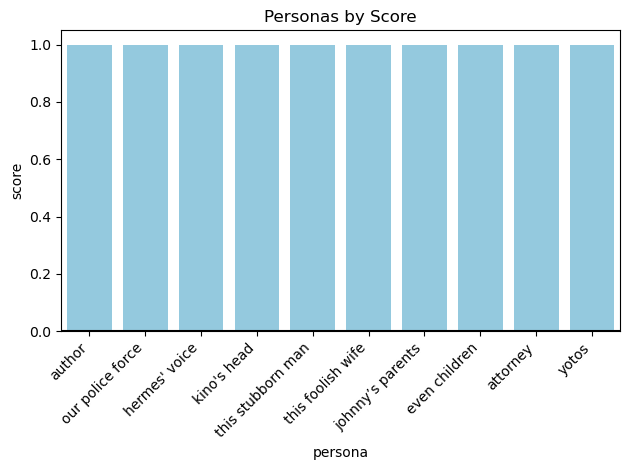

In [39]:
riveter.plot_scores()

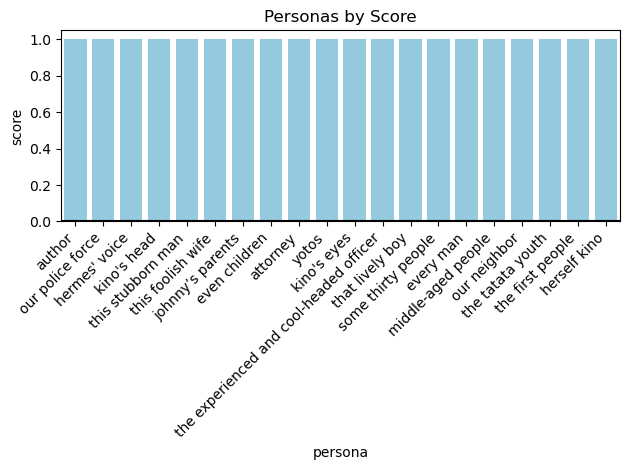

In [40]:
riveter.plot_scores(20)

## Get Scores, Subjects, and Direct Objects for Each Document

You can use the `.get_score_for_doc()` function to get power scores (or chosen dynamic scores) for each persona mentioned in a document (based on the document id passed into the training function).

In [43]:
riveter.get_scores_for_doc("v1c1")

{'the woman': 0.0,
 'the people': 1.0,
 'the ashen-eyed man': 0.0,
 'the man': 0.0,
 'hermes': -13.0,
 'its owner': 0.0,
 'a man': 6.0,
 'kino': 30.0,
 'a woman': 10.0,
 'such people': 0.0,
 'a girl': 0.0,
 'my mom': 0.0,
 'the innocent children': 1.0,
 'a young man in his prime': 3.0,
 'kino’s expression': 1.0,
 'i': 0.0,
 'a kind-looking middle-aged woman': 1.0,
 'one man': 1.0,
 'a man’s shadow': 2.0,
 'a man who appeared to be in his thirties': 2.0,
 'you': 1.0,
 'the children': 2.0,
 'the man walking away from her': 2.0,
 'the oldest-looking boy': 1.0,
 'an ashen-eyed man': 1.0,
 'a girl behind him who looked about twelve': 5.0,
 'all those children': 0.0,
 'rauher': 22.0,
 'my father': 0.0,
 'hermes’ handlebars': -1.0,
 'kino’s hesitation': 0.0,
 'a few people': -1.0,
 'hermes’ engine': -1.0,
 'his children': 0.0,
 'canon': -6.0,
 'children': -1.0,
 'my family': -1.0,
 'a man who leaped out from there': -1.0}

You can use `.count_nsubj_for_doc()` to get all noun subjects and verb pairs (regardless of whether the verb apperas in the chosen lexicon) for each document.

In [44]:
riveter.count_nsubj_for_doc("v1c1")

{('the woman', 'say'): 1,
 ('the people', 'end'): 1,
 ('the ashen-eyed man', 'say'): 1,
 ('the man', 'look'): 2,
 ('the man', 'respond'): 1,
 ('hermes', 'say'): 6,
 ('hermes', 'ask'): 11,
 ('hermes', 'mutter'): 1,
 ('the people', 'cower'): 1,
 ('the oldest-looking man', 'speak'): 1,
 ('the children', 'be'): 1,
 ('the man', 'cut'): 1,
 ('about thirty people', 'sit'): 1,
 ('several people', 'sleep'): 1,
 ('its owner', 'approach'): 1,
 ('a man', 'slip'): 1,
 ('the woman', 'be'): 1,
 ('the woman', 'speak'): 1,
 ('the ashen-eyed man', 'speak'): 1,
 ('kino', 'say'): 10,
 ('kino', 'answer'): 1,
 ('kino', 'think'): 2,
 ('kino', 'have'): 4,
 ('kino', 'hit'): 1,
 ('kino', 'make'): 3,
 ('kino', 'twist'): 1,
 ('kino', 'take'): 5,
 ('kino', 'tell'): 2,
 ('kino', 'stop'): 2,
 ('kino', 'stand'): 2,
 ('kino', 'see'): 3,
 ('kino', 'slow'): 1,
 ('kino', 'return'): 2,
 ('kino', 'mutter'): 2,
 ('kino', 'ask'): 15,
 ('kino', 'speak'): 2,
 ('kino', 'launch'): 1,
 ('kino', 'cut'): 1,
 ('kino', 'remove'): 2,


You can use `.count_dobj_for_doc()` to get all direct objects and verb pairs (regardless of whether the verb apperas in the chosen lexicon) for each document.

In [45]:
riveter.count_dobj_for_doc("v1c1")

{('my father', 'tell'): 1,
 ('hermes', 'ask'): 3,
 ('hermes’ handlebars', 'grab'): 1,
 ('kino’s hesitation', 'see'): 1,
 ('a few people', 'bring'): 1,
 ('hermes’ engine', 'start'): 1,
 ('kino', 'ask'): 2,
 ('kino', 'mind'): 1,
 ('kino', 'tell'): 1,
 ('kino', 'touch'): 1,
 ('kino', 'displease'): 1,
 ('kino', 'lend'): 1,
 ('kino', 'thank'): 1,
 ('kino', 'escort'): 1,
 ('kino', 'lead'): 1,
 ('kino', 'surround'): 1,
 ('kino', 'approach'): 1,
 ('kino', 'find'): 1,
 ('kino', 'conceal'): 1,
 ('kino', 'hurt'): 1,
 ('kino', 'release'): 1,
 ('kino', 'get'): 1,
 ('kino', 'pull'): 1,
 ('kino', 'see'): 1,
 ('kino', 'instruct'): 1,
 ('hermes', 'slow'): 1,
 ('hermes', 'stop'): 1,
 ('hermes', 'leave'): 2,
 ('hermes', 'surround'): 1,
 ('hermes', 'tell'): 1,
 ('his children', 'bear'): 1,
 ('canon', 'replace'): 1,
 ('a young man in his prime', 'follow'): 1,
 ('hermes', 'launch'): 1,
 ('hermes', 'examine'): 1,
 ('children', 'produce'): 1,
 ('children', 'bear'): 1,
 ('i', 'include'): 1,
 ('a kind-looking m

## Plot Scores for Each Document

You can use the `.plot_scores_for_doc()` function to display a bar plot with the top *n* or bottom *n* personas in a specified document. The function will display the top 10 highest-scoring personas by default.

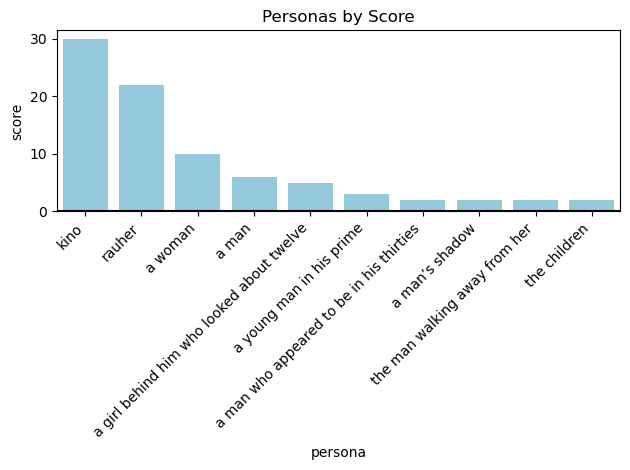

In [46]:
riveter.plot_scores_for_doc("v1c1")

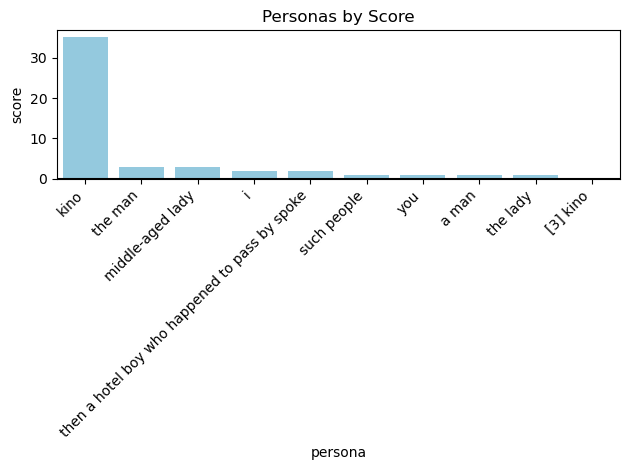

In [47]:
riveter.plot_scores_for_doc("v10c6")

## Regular Expression 

In [ ]:
riveter.train(example_stories,
              text_ids,
              persona_patterns_dict={'first person singular': r'^i$|^me$'})

 67%|█████████████████████████████████████████████████████████████████████▎                                  | 2/3 [00:00<00:00, 16.75it/s]

2023-02-22 23:20:03 Complete!


In [8]:
riveter.get_score_totals()

{'first person singular': -0.16666666666666666}

In [25]:
riveter = Riveter()
riveter.load_sap_lexicon('agency')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.77it/s]

2023-02-23 00:21:35 Complete!


In [26]:
riveter.get_score_totals()

{'i': 0.3333333333333333, 'my doctor': 0.2, 'susan': 0.5, 'the doctor': 0.0}

<br><br><br><br>

# **Small demo w/ Rashkin frames**

In [28]:
example_stories = ["I was just thinking about walking down the street, when my shoelace snapped. I had to call my doctor to pick me up. I felt so bad I also called my friend Katie, who came in her car. She was a lifesaver. My friend Jack is nice.",
                   "My doctor fixed my shoe. I thanked him. Then Susan arrived. Now she is calling the doctor too."]
text_ids = [0, 1]

In [29]:
riveter = Riveter()
riveter.load_rashkin_lexicon('effect')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 33.66it/s]

2023-02-22 23:20:37 Complete!


In [30]:
riveter.get_score_totals()

{'i': 0.34444444444450006,
 'my doctor': 0.27999999999999997,
 'susan': 0.16666666666649999}

In [31]:
riveter.get_scores_for_doc(0)

{'i': 1.4000000000000001, 'my doctor': 0.266666666667}

In [32]:
riveter.get_scores_for_doc(1)

{'susan': 0.33333333333299997,
 'i': 0.666666666667,
 'my doctor': 1.133333333333}

In [33]:
riveter = Riveter()
riveter.load_rashkin_lexicon('value')
riveter.train(example_stories,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32.23it/s]

2023-02-22 23:20:39 Complete!


In [34]:
riveter.get_score_totals()

{'i': 0.6444444444445,
 'my doctor': 0.6400000000002001,
 'susan': 0.5333333333335}

<br><br><br><br>

# **Bigger demo w/ Sap frames and example dataset**

In [8]:
texts = []
text_ids = []
stories_path = '/Users/maria/Documents/data/narrativity/litbank/original'   # Litbank corpus here: https://github.com/dbamman/litbank

j = 0
for _file_name in os.listdir(stories_path):
    _lines = []
    for _line in open(stories_path + '/' + _file_name, 'r'):
        if _line.strip():
            _lines.append(_line.strip())

    # Randomly sample 100 paragraphs from each book
    for _line in random.sample(_lines, 100):        
        texts.append(_line)
        text_ids.append(j)
        j += 1

len(texts), len(text_ids)

(10000, 10000)

In [24]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(texts,
             text_ids)

100%|██████████| 10000/10000 [01:33<00:00, 106.97it/s]

2023-02-22 22:29:49 Complete!


In [25]:
persona_score_dict = riveter.get_score_totals()
len(persona_score_dict)

704

In [26]:
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(_score, '\t', _persona)

1.0 	 daredevil
1.0 	 my dear man
1.0 	 dr. morton
1.0 	 dear georgiana
1.0 	 edna
1.0 	 even the kitchen
1.0 	 george, jr.
1.0 	 mrs. grose
1.0 	 esau
1.0 	 the wolfes
1.0 	 i know
1.0 	 old ben
1.0 	 sibyl vane's
1.0 	 poor dreadful mr. isaacs
1.0 	 cassandra
1.0 	 girls
1.0 	 both pedro
1.0 	 auchincloss's query
1.0 	 mr. boldwood
1.0 	 miss millward


In [32]:
# The scores above are skewed by infrequent entities.
# For example, an entity could appear just once in the dataset, and if it has power in that one instance, it will have a score of 1.0.
# We can remove the infrequent entities to clean up the ranked list.
# (Note that this wasn't a great test dataset because most entities don't occur very often; hopefully the NYT data is better!)

persona_count_dict = riveter.get_persona_counts()
persona_score_dict = {p: s for p, s in persona_score_dict.items() if persona_count_dict[p] >= 5}
len(persona_score_dict)

31

In [33]:
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 2), '\t', _persona)

0.33 	 tom
0.3 	 andy
0.27 	 your
0.26 	 mary
0.21 	 dick
0.2 	 the woman
0.2 	 jane
0.2 	 jock
0.19 	 helen
0.17 	 anne
0.15 	 the doctor
0.13 	 you
0.1 	 i
0.1 	 the old man
0.09 	 george
0.08 	 a woman
0.08 	 margaret
0.06 	 "i
0.04 	 myself
0.04 	 a man
0.02 	 the man
0.0 	 man
0.0 	 dale
0.0 	 philip
0.0 	 sir
0.0 	 joe
0.0 	 emma
0.0 	 alice
-0.1 	 woman
-0.11 	 anthony
-0.23 	 frank


In [34]:
riveter.get_persona_cluster('mary')

{'mary': 30, 'she': 4, 'you': 2, 'herself': 1, 'her': 1}

In [35]:
riveter.get_persona_cluster('you')

{'you': 930,
 'i': 37,
 'me': 8,
 'she': 3,
 'he': 2,
 'myself': 1,
 'yours': 1,
 'yourself': 1}

In [36]:
riveter.get_persona_cluster('the man')

{'the man': 42, 'him': 1, 'you': 1, 'i': 3, 'he': 1}

In [10]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(texts,
             text_ids,
             persona_patterns_dict={'masculine pronouns': r'^he$|^him$|^himself$',
                                    'feminine pronouns': r'^she$|^her$|^herself$',
                                    'third person plural pronouns': r'^they$|^them$|^themselves$'})

100%|██████████| 10000/10000 [01:31<00:00, 109.00it/s]

2023-02-22 23:06:03 Complete!


In [11]:
persona_score_dict = riveter.get_score_totals()
len(persona_score_dict)

3

In [13]:
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 3), '\t', _persona)

0.163 	 third person plural pronouns
0.122 	 masculine pronouns
0.117 	 feminine pronouns


In [14]:
riveter.get_persona_cluster('masculine pronouns')

{'he': 1480, 'him': 313, 'himself': 54}

In [15]:
riveter.get_persona_cluster('feminine pronouns')

{'she': 913, 'herself': 34, 'her': 203}

In [16]:
riveter.get_persona_cluster('third person plural pronouns')

{'them': 133, 'they': 400, 'themselves': 19}